### Linear Regression

- Azis Muslim
- Role: Decision Scientist at Startup Company

#### Problem Statement

There are some merchants on e-commerce that issues for inventory management because they need to sell more fast moving product to decrease inventory cost. This mini research gonna be building machine learning model to predict ratings based on views and product price category. We hope this model gonna be beneficial for the merchant owner to decide which product should they sell to decrease the inventory cost.

In [1]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Load customer interactions data
dfc = pd.read_csv("customer_interactions.csv")
dfc.head()

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110


In [3]:
dfc

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110


Based on the table above we can see that customer interaction tables were providing three information from tree columns, namely customer_id, page_views, and time_spent. In addition the table was also consisted from five rows.

In [4]:
# Function for data cleansing
def split_column_p(row):
    values = row['product_id;category;price;ratings;;;'].split(';')
    return pd.Series({
        'product_id': values[0],
        'category': values[1],
        'price': values[2] if values[2] else None,
        'ratings': values[3] if values[3] else None
    })

In [5]:
# Load product_details 
dpd = pd.read_csv("product_details.csv")
dpd.head()

,product_id;category;price;ratings;;;
0,101;Electronics;500;4.5;;;
1,102;Clothing;50;3.8;;;
2,103;Home & Kitchen;200;4.2;;;
3,104;Beauty;30;4.0;;;
4,105;Electronics;800;4.8;;;


The table that was load from product_details.csv still looks messy and to solve that issues I have already create a function to clean it up.

In [6]:
# Checking df value
dpd.columns.values.tolist()

['product_id;category;price;ratings;;;']

In [7]:
# Checking df values on a specific column
dpd['product_id;category;price;ratings;;;'].unique()

array(['101;Electronics;500;4.5;;;', '102;Clothing;50;3.8;;;',
       '103;Home & Kitchen;200;4.2;;;', '104;Beauty;30;4.0;;;',
       '105;Electronics;800;4.8;;;'], dtype=object)

In [8]:
# apply data cleansing function for priduct_details table
dpd1 = dpd.apply(split_column_p, axis=1)
dpd1

,product_id,category,price,ratings
0,101,Electronics,500,4.5
1,102,Clothing,50,3.8
2,103,Home & Kitchen,200,4.2
3,104,Beauty,30,4.0
4,105,Electronics,800,4.8


In [9]:
# Defining data cleansing function for purchase_history table
def split_column(row):
    values = row['customer_id;product_id;purchase_date;;;;'].split(';')
    return pd.Series({'customer_id': values[0], 'product_id': values[1], 'purchase_date': values[2]})

In [10]:
# Load purchase_history df
dph = pd.read_csv("purchase_history.csv")
dph.head()

,customer_id;product_id;purchase_date;;;;
0,1;101;2023-01-01;;;;
1,1;105;2023-01-05;;;;
2,2;102;2023-01-02;;;;
3,3;103;2023-01-03;;;;
4,4;104;2023-01-04;;;;


In [11]:
# Implementing the cleansing function
dph1 = dph.apply(split_column, axis=1)
dph1

,customer_id,product_id,purchase_date
0,1,101,2023-01-01
1,1,105,2023-01-05
2,2,102,2023-01-02
3,3,103,2023-01-03
4,4,104,2023-01-04
5,5,101,2023-01-05


#### Data Wrangling

After all of the data have been transformed as what we need for further pre-precessing we are going to processes it for data manipulation step

In [12]:
dfc

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110


page views and time spent could be the churn

In [13]:
dfc.columns.values.tolist()

['customer_id', 'page_views', 'time_spent']

In [14]:
dfc[['customer_id', 'page_views', 'time_spent']]

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110


In [15]:
dpd1

,product_id,category,price,ratings
0,101,Electronics,500,4.5
1,102,Clothing,50,3.8
2,103,Home & Kitchen,200,4.2
3,104,Beauty,30,4.0
4,105,Electronics,800,4.8


this could be the product category that most likely customer to buy

In [16]:
dpd1.columns.values.tolist()

['product_id', 'category', 'price', 'ratings']

In [17]:
dph1

,customer_id,product_id,purchase_date
0,1,101,2023-01-01
1,1,105,2023-01-05
2,2,102,2023-01-02
3,3,103,2023-01-03
4,4,104,2023-01-04
5,5,101,2023-01-05


In [18]:
dph1.columns.values.tolist()

['customer_id', 'product_id', 'purchase_date']

In [19]:
# dph1[['customer_id', 'product_id', 'purchase_date']]
# dpd1[['product_id', 'category', 'price', 'ratings']]

Join dph1 & dpd1 on product id

In [20]:
# Join the DataFrames based on 'product_id'
dhd = pd.merge(dph1[['customer_id', 'product_id', 'purchase_date']], dpd1[['product_id', 'category', 'price', 'ratings']], on='product_id')
dhd

,customer_id,product_id,purchase_date,category,price,ratings
0,1,101,2023-01-01,Electronics,500,4.5
1,5,101,2023-01-05,Electronics,500,4.5
2,1,105,2023-01-05,Electronics,800,4.8
3,2,102,2023-01-02,Clothing,50,3.8
4,3,103,2023-01-03,Home & Kitchen,200,4.2
5,4,104,2023-01-04,Beauty,30,4.0


In [21]:
dfc

,customer_id,page_views,time_spent
0,1,25,120
1,2,20,90
2,3,30,150
3,4,15,80
4,5,22,110


In [22]:
dfc.columns.values.tolist()

['customer_id', 'page_views', 'time_spent']

In [23]:
dhd.columns.values.tolist()

['customer_id', 'product_id', 'purchase_date', 'category', 'price', 'ratings']

In [24]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  5 non-null      int64
 1   page_views   5 non-null      int64
 2   time_spent   5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


In [25]:
dhd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    6 non-null      object
 1   product_id     6 non-null      object
 2   purchase_date  6 non-null      object
 3   category       6 non-null      object
 4   price          6 non-null      object
 5   ratings        6 non-null      object
dtypes: object(6)
memory usage: 336.0+ bytes


The data type is different for key customer id, transform it first before it joined

In [26]:
# based on the code below customize 'customer_id' to be int64
dhd[['customer_id', 'product_id', 'purchase_date', 'category', 'price', 'ratings']]

,customer_id,product_id,purchase_date,category,price,ratings
0,1,101,2023-01-01,Electronics,500,4.5
1,5,101,2023-01-05,Electronics,500,4.5
2,1,105,2023-01-05,Electronics,800,4.8
3,2,102,2023-01-02,Clothing,50,3.8
4,3,103,2023-01-03,Home & Kitchen,200,4.2
5,4,104,2023-01-04,Beauty,30,4.0


In [27]:
# Transform 'customer_id' dtype to int64
dhd['customer_id'] = dhd['customer_id'].astype('int64')

In [28]:
# Select the desired columns
dhd = dhd[['customer_id', 'product_id', 'purchase_date', 'category', 'price', 'ratings']]

In [29]:
dhd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    6 non-null      int64 
 1   product_id     6 non-null      object
 2   purchase_date  6 non-null      object
 3   category       6 non-null      object
 4   price          6 non-null      object
 5   ratings        6 non-null      object
dtypes: int64(1), object(5)
memory usage: 336.0+ bytes


In [30]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  5 non-null      int64
 1   page_views   5 non-null      int64
 2   time_spent   5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


In [31]:
# Merge all of tables to be one to make the analysis process more easy
dcd = pd.merge(dfc[['customer_id', 'page_views', 'time_spent']], dhd[['customer_id', 'product_id', 'purchase_date', 'category', 'price', 'ratings']], on='customer_id')
dcd

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,105,2023-01-05,Electronics,800,4.8
2,2,20,90,102,2023-01-02,Clothing,50,3.8
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
4,4,15,80,104,2023-01-04,Beauty,30,4.0
5,5,22,110,101,2023-01-05,Electronics,500,4.5


Based on the code  above we can forecast time spent and page views with time series otherwise the datetime need to be re-format.

In [32]:
dcd.columns.values.tolist()

['customer_id',
 'page_views',
 'time_spent',
 'product_id',
 'purchase_date',
 'category',
 'price',
 'ratings']

In [33]:
dcd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    6 non-null      int64 
 1   page_views     6 non-null      int64 
 2   time_spent     6 non-null      int64 
 3   product_id     6 non-null      object
 4   purchase_date  6 non-null      object
 5   category       6 non-null      object
 6   price          6 non-null      object
 7   ratings        6 non-null      object
dtypes: int64(3), object(5)
memory usage: 432.0+ bytes


In [34]:
dcd[['customer_id',
 'page_views',
 'time_spent',
 'product_id',
 'purchase_date',
 'category',
 'price',
 'ratings']]

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,105,2023-01-05,Electronics,800,4.8
2,2,20,90,102,2023-01-02,Clothing,50,3.8
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
4,4,15,80,104,2023-01-04,Beauty,30,4.0
5,5,22,110,101,2023-01-05,Electronics,500,4.5


In [35]:
dcd['purchase_date'] = pd.to_datetime(dcd['purchase_date'])

In [36]:
dcd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    6 non-null      int64         
 1   page_views     6 non-null      int64         
 2   time_spent     6 non-null      int64         
 3   product_id     6 non-null      object        
 4   purchase_date  6 non-null      datetime64[ns]
 5   category       6 non-null      object        
 6   price          6 non-null      object        
 7   ratings        6 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 432.0+ bytes


In [37]:
dcd1 = dcd.sort_values(by='purchase_date', ascending=True)
dcd1

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
2,2,20,90,102,2023-01-02,Clothing,50,3.8
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
4,4,15,80,104,2023-01-04,Beauty,30,4.0
1,1,25,120,105,2023-01-05,Electronics,800,4.8
5,5,22,110,101,2023-01-05,Electronics,500,4.5


In [38]:
# Based on the code below visualize 'time_spent' based on the time series data 'purchase_date' in radial time series visualization
dcd[['customer_id',
 'page_views',
 'time_spent',
 'product_id',
 'purchase_date',
 'category',
 'price',
 'ratings']]

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,105,2023-01-05,Electronics,800,4.8
2,2,20,90,102,2023-01-02,Clothing,50,3.8
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
4,4,15,80,104,2023-01-04,Beauty,30,4.0
5,5,22,110,101,2023-01-05,Electronics,500,4.5


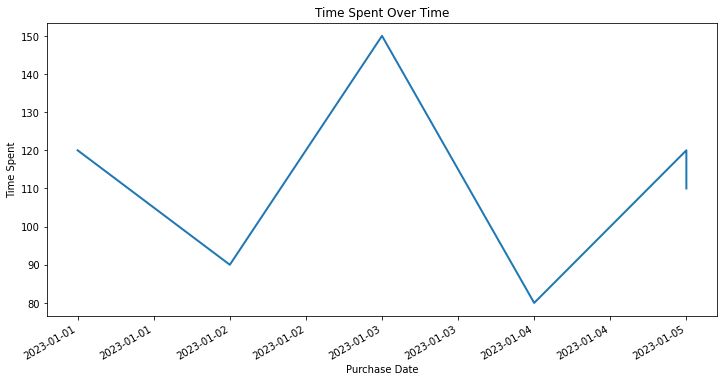

In [39]:
# Time Spent
df = dcd[['customer_id', 'page_views', 'time_spent', 'product_id', 'purchase_date', 'category', 'price', 'ratings']]

# Ensure 'purchase_date' is in datetime format
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Set 'purchase_date' as the index
df = df.set_index('purchase_date')

# Create the line plot with formatted date labels
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
df['time_spent'].plot(linewidth=2)

# Format the x-axis labels using a custom formatter
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.title("Time Spent Over Time")
plt.xlabel("Purchase Date")
plt.ylabel("Time Spent")
plt.show()


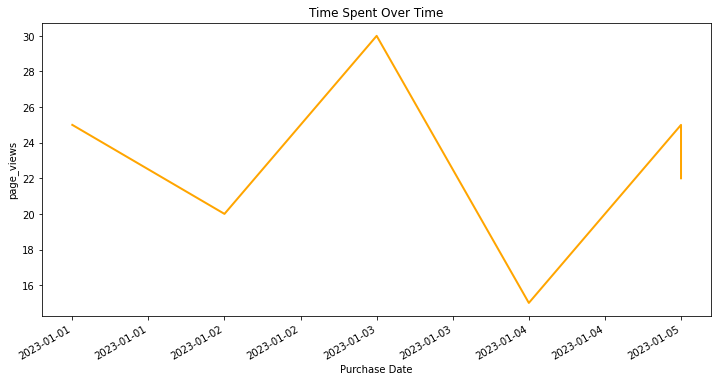

In [40]:
# Page Views
df1 = dcd[['customer_id', 'page_views', 'time_spent', 'product_id', 'purchase_date', 'category', 'price', 'ratings']]

# Ensure 'purchase_date' is in datetime format
df1['purchase_date'] = pd.to_datetime(df1['purchase_date'])

# Set 'purchase_date' as the index
df1 = df1.set_index('purchase_date')

# Create the line plot with orange color
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
df1['page_views'].plot(color='orange', linewidth=2)  # Set color to orange

# Format the x-axis labels using a custom formatter
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.title("Time Spent Over Time")
plt.xlabel("Purchase Date")
plt.ylabel('page_views')
plt.show()


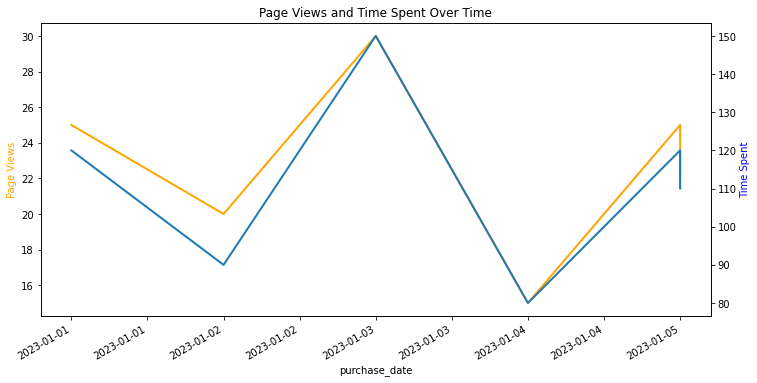

In [41]:
# Load your DataFrame
df = dcd[['customer_id', 'page_views', 'time_spent', 'product_id', 'purchase_date', 'category', 'price', 'ratings']]

# Ensure 'purchase_date' is in datetime format
df['purchase_date'] = pd.to_datetime(df['purchase_date'])

# Set 'purchase_date' as the index
df = df.set_index('purchase_date')

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'page_views' on the left axis
df['page_views'].plot(color='orange', linewidth=2, ax=ax1)
ax1.set_ylabel('Page Views', color='orange')

# Create a twin axis for 'time_spent' on the right
ax2 = ax1.twinx()
df['time_spent'].plot(linewidth=2, ax=ax2)
ax2.set_ylabel('Time Spent', color='blue')

# Format the x-axis labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

# Set title and labels
plt.title("Page Views and Time Spent Over Time")
plt.xlabel("Purchase Date")
plt.show()

Based on the chart above we can see that there are correlation between between two variables and they are page views and time spent. Because Linear regression required some assumption that have to be met I would drop varibale that affecting one on another and in this regards is time spent.

I decided to drop time spent instead of page views because page views is more uniqe than time spent. Customer in e-commerce might spend a lot of time to see the product but it do not tell the churn meanwhile page views was clearly tells the churn rate through the amount of people who view the products. 

Data Visualization is done, now you can go to modeling

In [42]:
dcd

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,105,2023-01-05,Electronics,800,4.8
2,2,20,90,102,2023-01-02,Clothing,50,3.8
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
4,4,15,80,104,2023-01-04,Beauty,30,4.0
5,5,22,110,101,2023-01-05,Electronics,500,4.5


varibale that could be affect customer to buy product were ratings, page views, and time spent. The argument that cover it is quite simple. If the customer spent more time for certain product category means they have high interest for that product, it is the same thing like page views. In e-commerce rating usually something that we would like to give after we bought the products. Based on that scenario I would like to predict the next rating by using the existing variables.

In [43]:
dcd.columns.values.tolist()

['customer_id',
 'page_views',
 'time_spent',
 'product_id',
 'purchase_date',
 'category',
 'price',
 'ratings']

In [44]:
dcd

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,105,2023-01-05,Electronics,800,4.8
2,2,20,90,102,2023-01-02,Clothing,50,3.8
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
4,4,15,80,104,2023-01-04,Beauty,30,4.0
5,5,22,110,101,2023-01-05,Electronics,500,4.5


In [45]:
dcd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    6 non-null      int64         
 1   page_views     6 non-null      int64         
 2   time_spent     6 non-null      int64         
 3   product_id     6 non-null      object        
 4   purchase_date  6 non-null      datetime64[ns]
 5   category       6 non-null      object        
 6   price          6 non-null      object        
 7   ratings        6 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 432.0+ bytes


In [46]:
# convert price to integer
dcd['price'] = dcd['price'].astype('int64')

In [47]:
dcd[['customer_id',
 'page_views',
 'time_spent',
 'product_id',
 'purchase_date',
 'category',
 'price',
 'ratings']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    6 non-null      int64         
 1   page_views     6 non-null      int64         
 2   time_spent     6 non-null      int64         
 3   product_id     6 non-null      object        
 4   purchase_date  6 non-null      datetime64[ns]
 5   category       6 non-null      object        
 6   price          6 non-null      int64         
 7   ratings        6 non-null      object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 432.0+ bytes


/var/folders/2r/wbfg0gj94yz2vq2hskl8h_q00000gn/T/ipykernel_89126/2938838722.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='price', data=dcd, ci=None)


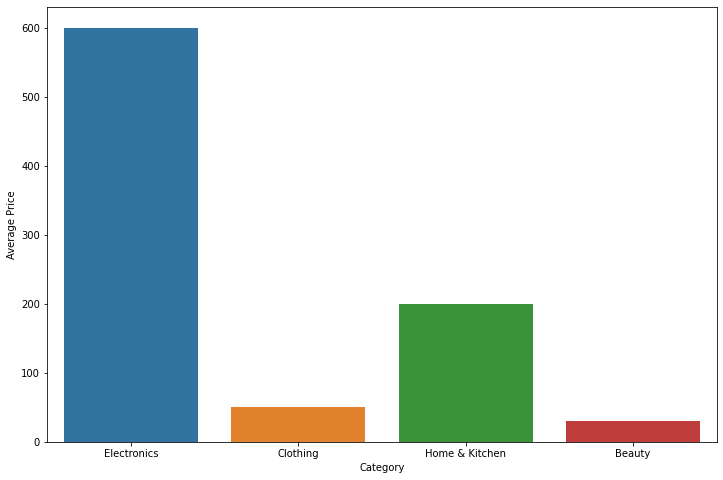

In [48]:
# Visualization using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='price', data=dcd, ci=None)  
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()


Based on the barplot above we can see that electronics have the higher price level followed by home & kithen category, clothing and beauty

/var/folders/2r/wbfg0gj94yz2vq2hskl8h_q00000gn/T/ipykernel_89126/390525939.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='page_views', data=dcd, ci=None)  # ci=None removes the error bars


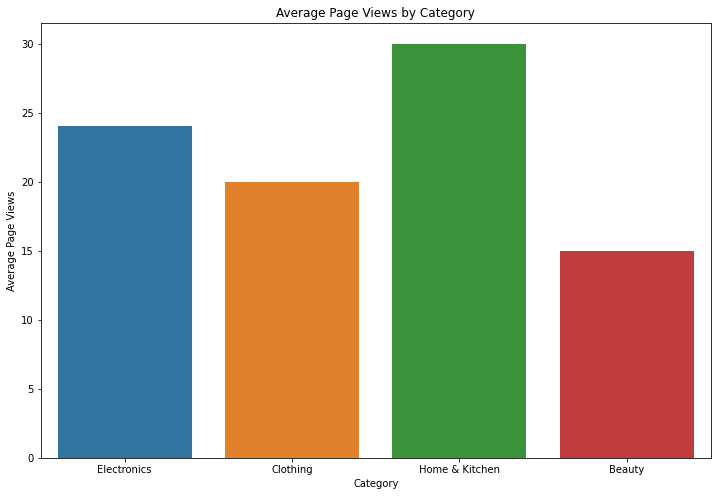

In [49]:
# Visualization using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='page_views', data=dcd, ci=None)  # ci=None removes the error bars
plt.title('Average Page Views by Category')
plt.xlabel('Category')
plt.ylabel('Average Page Views')
plt.show()

Based on the barplot above we can see that the most seen merchants category were home & kitchen followed by electronics, clothing, and beauty

/var/folders/2r/wbfg0gj94yz2vq2hskl8h_q00000gn/T/ipykernel_89126/4141616068.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='time_spent', data=dcd, ci=None)  # ci=None removes the error bars


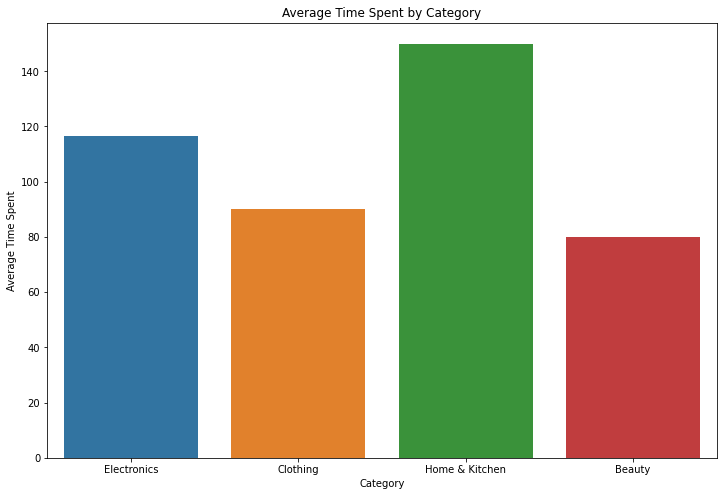

In [50]:
# Visualization using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='time_spent', data=dcd, ci=None)  # ci=None removes the error bars
plt.title('Average Time Spent by Category')
plt.xlabel('Category')
plt.ylabel('Average Time Spent')
plt.show()

The barplot above show something similar for what we have already seen on views ranks by category where electronics have the higher price level followed by home & kitchen category, clothing and beauty.

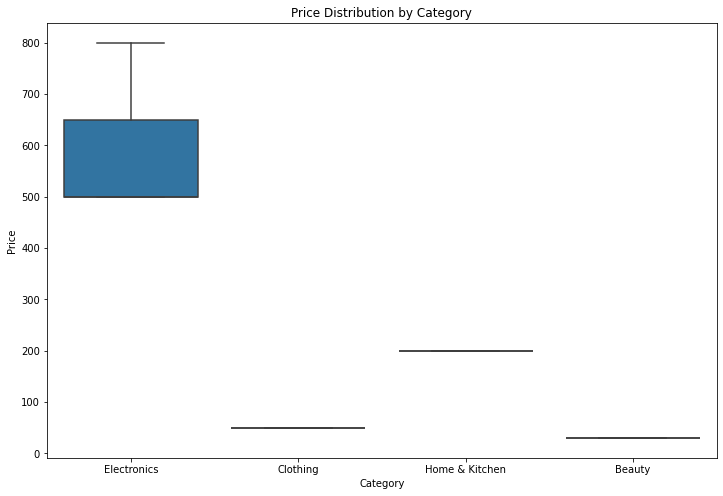

In [51]:
# Visualization using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='price', data=dcd)
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

Based on the code above we can see that price distribution was concentrated on electronics.

In [54]:
dcd1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    6 non-null      int64         
 1   page_views     6 non-null      int64         
 2   time_spent     6 non-null      int64         
 3   product_id     6 non-null      object        
 4   purchase_date  6 non-null      datetime64[ns]
 5   category       6 non-null      object        
 6   price          6 non-null      object        
 7   ratings        6 non-null      object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 432.0+ bytes


In [56]:
dcd['ratings'] = dcd['ratings'].astype('float64')

/var/folders/2r/wbfg0gj94yz2vq2hskl8h_q00000gn/T/ipykernel_89126/1876873270.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='category', y='ratings', data=dcd, ci=None)  # ci=None removes the error bars


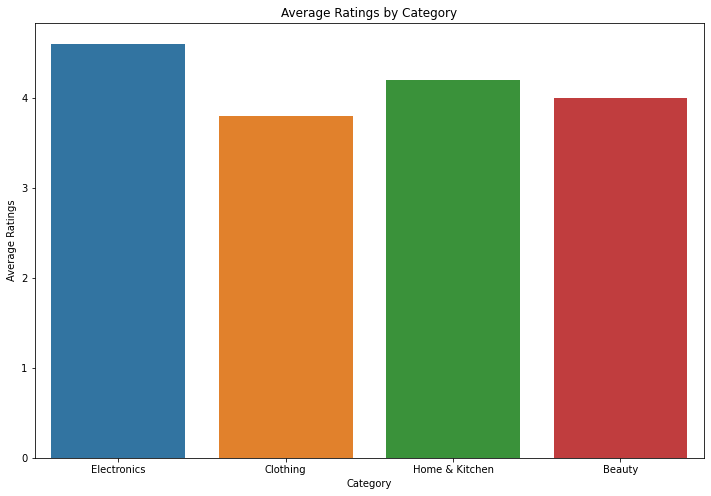

In [57]:
# Visualization using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='ratings', data=dcd, ci=None)  # ci=None removes the error bars
plt.title('Average Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Ratings')
plt.show()

Based on the barplot above we can take the information that electronics got the highest ratings followed by home & kitchen, beauty, and clothing. There an insight here where in two previous barplot visualisation of time views and time spent based on category the ranks' order were home & kitchen, electronics, clothing, and beauty. When its plotted for average price based on category, beauty still in the last position meanwhile for the rating result they don't get least ratings score.

In [58]:
# Converting ratings columns dtype to float 
dcd[['customer_id', 'page_views', 'time_spent', 'product_id', 'purchase_date', 'category', 'price', 'ratings']] = dcd[['customer_id', 'page_views', 'time_spent', 'product_id', 'purchase_date', 'category', 'price', 'ratings']].astype({'ratings': float})

dcd[['customer_id', 'page_views', 'time_spent', 'product_id', 'purchase_date', 'category', 'price', 'ratings']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    6 non-null      int64         
 1   page_views     6 non-null      int64         
 2   time_spent     6 non-null      int64         
 3   product_id     6 non-null      object        
 4   purchase_date  6 non-null      datetime64[ns]
 5   category       6 non-null      object        
 6   price          6 non-null      int64         
 7   ratings        6 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 432.0+ bytes


In [59]:
dcd1 = dcd[['customer_id',
 'page_views',
 'time_spent',
 'product_id',
 'purchase_date',
 'category',
 'price',
 'ratings']]

In [60]:
tmseries = dcd1

In [61]:
tmseries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    6 non-null      int64         
 1   page_views     6 non-null      int64         
 2   time_spent     6 non-null      int64         
 3   product_id     6 non-null      object        
 4   purchase_date  6 non-null      datetime64[ns]
 5   category       6 non-null      object        
 6   price          6 non-null      int64         
 7   ratings        6 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 432.0+ bytes


In [62]:
tmseries['purchase_date'] = pd.to_datetime(tmseries['purchase_date'])

In [63]:
tmseries['Month'] = tmseries['purchase_date'].dt.month
tmseries['Year'] = tmseries['purchase_date'].dt.year
tmseries

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings,Month,Year
0,1,25,120,101,2023-01-01,Electronics,500,4.5,1,2023
1,1,25,120,105,2023-01-05,Electronics,800,4.8,1,2023
2,2,20,90,102,2023-01-02,Clothing,50,3.8,1,2023
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2,1,2023
4,4,15,80,104,2023-01-04,Beauty,30,4.0,1,2023
5,5,22,110,101,2023-01-05,Electronics,500,4.5,1,2023


In [64]:
tmseries.set_index('purchase_date',inplace=True)
tmseries.head()

,customer_id,page_views,time_spent,product_id,category,price,ratings,Month,Year
purchase_date,,,,,,,,,
2023-01-01,1,25,120,101,Electronics,500,4.5,1,2023
2023-01-05,1,25,120,105,Electronics,800,4.8,1,2023
2023-01-02,2,20,90,102,Clothing,50,3.8,1,2023
2023-01-03,3,30,150,103,Home & Kitchen,200,4.2,1,2023
2023-01-04,4,15,80,104,Beauty,30,4.0,1,2023


In [65]:
tmseries.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2023-01-01 to 2023-01-05
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  6 non-null      int64  
 1   page_views   6 non-null      int64  
 2   time_spent   6 non-null      int64  
 3   product_id   6 non-null      object 
 4   category     6 non-null      object 
 5   price        6 non-null      int64  
 6   ratings      6 non-null      float64
 7   Month        6 non-null      int64  
 8   Year         6 non-null      int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 480.0+ bytes


<Axes: title={'center': 'ratings'}, xlabel='purchase_date'>

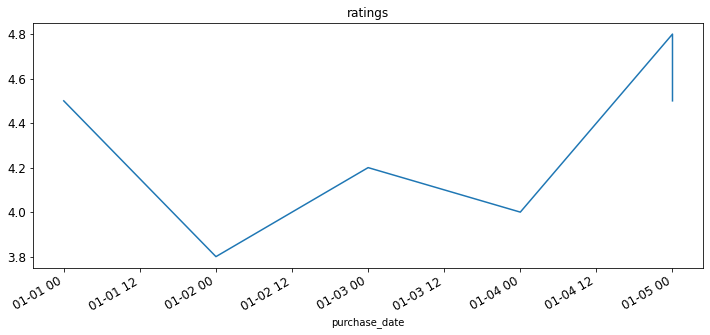

In [66]:
tmseries['ratings'].plot(figsize=(12,5), title= 'ratings', fontsize=12) ## visualization

these are historical data that could predict next behaviour by utilizing machine learning model

- Business Context
- Problem Statement
- Application

application that predicts the next product a customer is likely to buy. The application should be user-friendly, allowing marketing teams to target customers more effectively.

In this mini research I have decided to pick ratings as the target variable to be predicted. Ratings in e-commerce usually would be given after customers finished the process of purchashing products then they give ratings afterwards. Based on that type of behaviour I pick ratings as representation of varible that is gonna be use to predict the next product a customer is more likely to buy.

In [67]:
dcd

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,105,2023-01-05,Electronics,800,4.8
2,2,20,90,102,2023-01-02,Clothing,50,3.8
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
4,4,15,80,104,2023-01-04,Beauty,30,4.0
5,5,22,110,101,2023-01-05,Electronics,500,4.5


In [68]:
dcd.columns.values.tolist()

['customer_id',
 'page_views',
 'time_spent',
 'product_id',
 'purchase_date',
 'category',
 'price',
 'ratings']

In [69]:
dcd[['customer_id',
 'page_views',
 'time_spent',
 'product_id',
 'purchase_date',
 'category',
 'price',
 'ratings']]

,customer_id,page_views,time_spent,product_id,purchase_date,category,price,ratings
0,1,25,120,101,2023-01-01,Electronics,500,4.5
1,1,25,120,105,2023-01-05,Electronics,800,4.8
2,2,20,90,102,2023-01-02,Clothing,50,3.8
3,3,30,150,103,2023-01-03,Home & Kitchen,200,4.2
4,4,15,80,104,2023-01-04,Beauty,30,4.0
5,5,22,110,101,2023-01-05,Electronics,500,4.5


In [70]:
# Check the column names
print(dcd.columns)

Index(['customer_id', 'page_views', 'time_spent', 'product_id',
       'purchase_date', 'category', 'price', 'ratings'],
      dtype='object')


In [71]:
# Select features and target variable
features = ['page_views', 'price']
target = 'ratings'

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dcd[features], dcd[target], test_size=0.2, random_state=42)

#### Linear Regression

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables. It assumes that this relationship can be expressed as a linear equation. In simpler terms, linear regression helps us understand how changes in one variable are associated with changes in another.

Here's an explanation suitable for a college student:

1. **Dependent and Independent Variables:**
   - In linear regression, you have a dependent variable (what you're trying to predict) and one or more independent variables (predictors or features).

2. **Linear Relationship:**
   - The fundamental assumption is that the relationship between the dependent variable and the independent variable(s) is linear. This means that when you plot the data on a graph, it should roughly form a straight line.

3. **Regression Equation:**
   - The goal of linear regression is to find the best-fitting line that represents the relationship between the variables. This line is described by a simple equation, like \(Y = mx + b\), where \(Y\) is the dependent variable, \(x\) is the independent variable, \(m\) is the slope of the line, and \(b\) is the y-intercept.

4. **Least Squares Method:**
   - Linear regression uses the least squares method to find the line that minimizes the sum of the squared differences between the observed and predicted values. The line is chosen to minimize the overall error.

5. **Assumptions:**
   - Several assumptions are associated with linear regression, and it's important to check if these assumptions hold for the model results to be valid. The key assumptions include:
      - **Linearity:** The relationship between the variables is linear.
      - **Independence:** The residuals (the differences between observed and predicted values) are independent.
      - **Homoscedasticity:** The variance of the residuals is constant across all levels of the independent variable(s).
      - **Normality of Residuals:** The residuals follow a normal distribution.
      - **No Perfect Multicollinearity:** In multiple linear regression (more than one independent variable), there should not be perfect linear relationships between the independent variables.

6. **Interpretation:**
   - Once the model is trained, you can use it to make predictions or understand the relationship between variables. The coefficients (slope and intercept) provide insights into how much the dependent variable changes for each unit change in the independent variable.

In [75]:
# Initialize the linear regression model
model = LinearRegression()

In [76]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [77]:
# Make predictions on the test data
predictions = model.predict(X_test)

Mean Squared Error (MSE) is a commonly used metric in statistics and machine learning to measure the average squared difference between the predicted values and the actual values. It is a way to quantify the accuracy of a predictive model.

The formula for Mean Squared Error is:

\[ MSE = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 \]

Where:
- \( n \) is the number of data points or observations.
- \( Y_i \) represents the actual value of the ith observation.
- \( \hat{Y}_i \) represents the predicted value of the ith observation.

Here's a breakdown of the components:

1. Subtract the predicted value from the actual value (\(Y_i - \hat{Y}_i\)).
2. Square the result to eliminate negative differences and emphasize larger errors.
3. Sum up all the squared differences for all observations.
4. Divide by the number of observations (\(n\)) to get the average.

MSE is useful because it penalizes larger errors more heavily than smaller ones, providing a measure of how well a model is performing across a set of predictions. Lower MSE values indicate better model performance, as they represent smaller average squared differences between predicted and actual values. It is often used in the context of regression problems, where the goal is to predict a continuous numeric value.

In [78]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0051852514049506625


The lower means square error the better model to predict ratings in this case

In [79]:
model_filename = 'ratings_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

print(f'Model saved to {model_filename}')

Model saved to ratings_model.pkl


In [80]:
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

#### Testing The Model for Inference Data

In [81]:
new_data = pd.DataFrame({'page_views': [100, 150, 200], 'price': [20.0, 25.0, 30.0]})

In [82]:
predictions_new_data = loaded_model.predict(new_data[['page_views', 'price']])

In [83]:
# Print the prediction results.
print('Predictions for new data:')
print(predictions_new_data)

Predictions for new data:
[4.06288943 4.17157297 4.28025652]


The model that have been given a test to predict ratings based on various combinations page views and price and the results are 4.06288943, 4.17157297, 4.28025652 respectively for these input variable. Page views 100 and price 20.0 would predict 4.06. Page views 150 and price 25.0 would predict 4.17. Page views 200 and price 30 would predict 4.28 ratings.

#### Conclusion

- There an insight here where in two previous barplot visualisation of time views and time spent based on category the ranks' order were home & kitchen, electronics, clothing, and beauty. When its plotted for average price based on category, beauty still in the last position meanwhile for the rating result they don't get least ratings score.

- The input data from the model do not provide ratings that are below 3.8, it would affect the model to give the ratings for 3.8 for the lowest ratings. More input data for next research would make the model predict better ratings score.